# Lab - 3 
# Running the KS Test on Big Data 


 When we try opening the 689MB .csv file in Excel, we get a warning that says that Excel cannot load more than 10,00,000 rows of data. Our data contains 70,09,030 rows of data and hence, performing the KS test on this data is not possible in Excel. 

## Importing the required libraries

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
import statistics as s

In [116]:
#reading the csv file using pandas
df = pd.read_csv('/Users/riddhi/Downloads/2008.csv')

The dataset has the following columns:

In [117]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

## Checking for null/NaN values and replacing them with the mean for the AirTime and the Distance features

In [118]:
df['AirTime'].isnull().values.sum()

154699

In [119]:
df['AirTime'].fillna(df['AirTime'].mean(), inplace = True)
df['AirTime'].isnull().values.sum()

0

In [185]:
df['Distance'].fillna(df['AirTime'].mean(), inplace = True)
df['Distance'].isnull().values.sum()
df_dist = pd.DataFrame(df['Distance'])
df_airtime = pd.DataFrame(df['AirTime'])
df_airtime

,AirTime
0,116.0
1,113.0
2,76.0
3,78.0
4,77.0
...,...
7009723,71.0
7009724,139.0
7009725,85.0
7009726,89.0


## Removing outliers from the above features

In [190]:
#Finding the Inter-Quartile Range (IQR)
Q1_dist = np.percentile(df['Distance'],25)
Q3_dist = np.percentile(df['Distance'],75)
IQR_dist = Q3_dist - Q1_dist
low_dist = Q1_dist - 1.5*(IQR_dist)
high_dist = Q3_dist + 1.5*(IQR_dist)
print('The outliers for the Distance feature lie above {} and below {}.'.format(high_dist,low_dist))

The outliers for the Distance feature lie above 1897.5 and below -618.5.


In [202]:
dist_drop_ol = df_dist.drop(df_dist[df_dist.Distance>high_dist].index)
dist_drop_ol = dist_drop_ol.drop(dist_drop_ol[dist_drop_ol.Distance<low_dist].index)
dist_drop_ol.describe()

,Distance
count,6.634301e+06
mean,6.342557e+02
std,4.094930e+02
min,1.100000e+01
25%,3.140000e+02
50%,5.440000e+02
75%,8.720000e+02
max,1.891000e+03


In [191]:
#Finding the Inter-Quartile Range (IQR) for Air Time
Q1_at = np.percentile(df['AirTime'],25)
Q3_at = np.percentile(df['AirTime'],75)
IQR_at = Q3_at - Q1_at
low_at = Q1_at - 1.5*(IQR_at)
high_at = Q3_at + 1.5*(IQR_at)
print('The outliers for the Air Time feature lie above {} and below {}.'.format(high_at,low_at))

The outliers for the Air Time feature lie above 243.5 and below -56.5.


In [193]:
at_drop_ol = df_airtime.drop( df_airtime[df_airtime.AirTime>high_at].index)
at_drop_ol = at_drop_ol.drop( at_drop_ol[at_drop_ol.AirTime<low_at].index)
at_drop_ol

,AirTime
0,116.0
1,113.0
2,76.0
3,78.0
4,77.0
...,...
7009723,71.0
7009724,139.0
7009725,85.0
7009726,89.0


# Normalizing Distance and Airtime

In [207]:
dist_norm = pd.DataFrame((dist_drop_ol - dist_drop_ol.mean())/np.std(dist_drop_ol))
dist_norm.describe()

,Distance
count,6.634301e+06
mean,-4.215179e-14
std,1.000000e+00
min,-1.522018e+00
25%,-7.820787e-01
50%,-2.204085e-01
75%,5.805821e-01
max,3.069025e+00


We can see in the above cell that the mean is almost zero and the standard deviation is at 1. Hence, we have normalized the Distance feature.

In [208]:
at_norm = pd.DataFrame((at_drop_ol - at_drop_ol.mean())/np.std(at_drop_ol))
at_norm.describe()

,AirTime
count,6.643074e+06
mean,-3.819961e-12
std,1.000000e+00
min,-1.896309e+00
25%,-7.794894e-01
50%,-1.906209e-01
75%,5.809999e-01
max,3.038003e+00


We can see in the above cell that the mean is almost zero and the standard deviation is at 1. Hence, we have normalized the AirTime feature.

In all of the above cells, we removed outliers from the data using the Inter Quartile Range and then normalized the data. Our data is now ready to be used for the KS test.

## Visualizing the data in the two features with a normally distributed and randomly generated dataset

In [268]:
# Mean = 0, SD = 1

x_axis_dist = np.arange(dist_norm['Distance'].min()-2, dist_norm['Distance'].max()+2, 0.001)

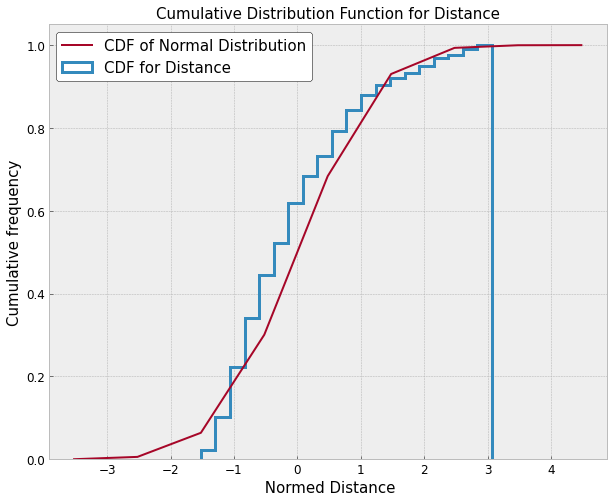

In [269]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - CDF
fig = plt.hist(dist_norm, bins = 20, alpha=1, cumulative=True,histtype='step', lw=3, density=True, label='CDF for Distance')
plt.title('Cumulative Distribution Function for Distance', fontsize=15, color='k')
plt.xlabel(' Normed Distance', fontsize=15, color='k')
plt.ylabel('Cumulative frequency', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_dist, scipy.stats.norm.cdf(x_axis_dist,0,1), label='CDF of Normal Distribution')

plt.legend(loc='best',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

In [270]:
# Mean = 0, SD = 1

x_axis_at = np.arange(at_norm['AirTime'].min()-2, at_norm['AirTime'].max()+2, 0.001)
at_norm['AirTime'].min()

-1.896308885647989

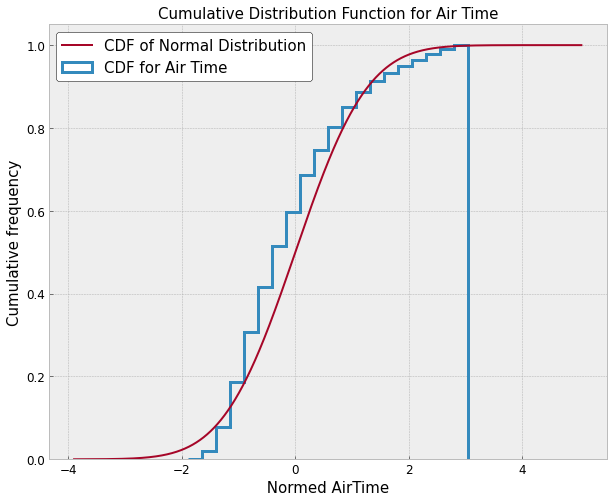

In [271]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - CDF 
fig = plt.hist(at_norm, bins = 20, alpha=1, cumulative=True, histtype='step', lw=3, density=True, label='CDF for Air Time')
plt.title('Cumulative Distribution Function for Air Time', fontsize=15, color='k')
plt.xlabel(' Normed AirTime ', fontsize=15, color='k')
plt.ylabel('Cumulative frequency', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_at, scipy.stats.norm.cdf(x_axis_at,0,1), label='CDF of Normal Distribution')

plt.legend(loc='best',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

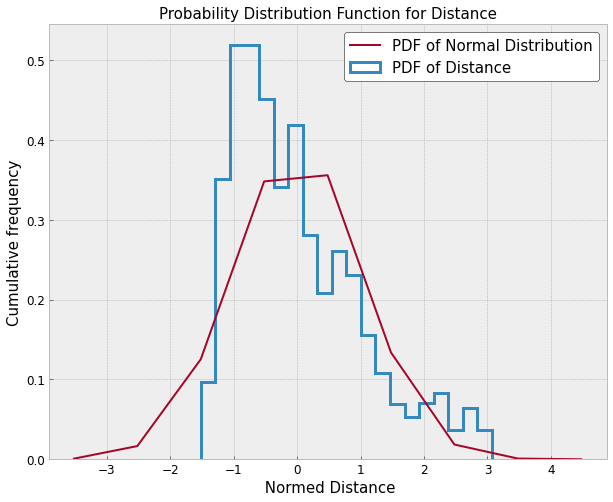

In [272]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - PDF
fig = plt.hist(dist_norm, bins = 20, alpha=1,histtype='step', lw=3, density=True, label='PDF of Distance')
plt.title('Probability Distribution Function for Distance', fontsize=15, color='k')
plt.xlabel(' Normed Distance', fontsize=15, color='k')
plt.ylabel('Cumulative frequency', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_dist, scipy.stats.norm.pdf(x_axis_dist,0,1), label='PDF of Normal Distribution')

plt.legend(loc='best',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

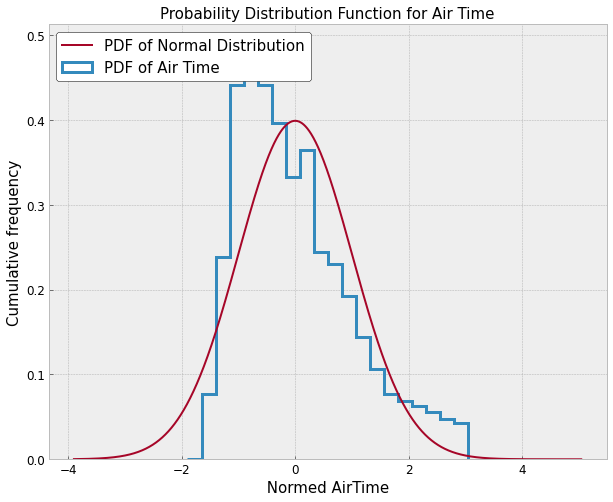

In [273]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - PDF
fig = plt.hist(at_norm, bins = 20, alpha=1, histtype='step', lw=3, density=True, label='PDF of Air Time')
plt.title('Probability Distribution Function for Air Time', fontsize=15, color='k')
plt.xlabel(' Normed AirTime ', fontsize=15, color='k')
plt.ylabel('Cumulative frequency', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_at, scipy.stats.norm.pdf(x_axis_at,0,1), label='PDF of Normal Distribution')

plt.legend(loc='upper left',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

In [293]:
x_axis_dist = np.arange(dist_norm['Distance'].min(), dist_norm['Distance'].max(), 1)
x_axis_at = np.arange(at_norm['AirTime'].min(), at_norm['AirTime'].max(), 1)

print(scipy.stats.ks_2samp(at_norm['AirTime'],dist_norm['Distance']))
print(scipy.stats.ks_2samp(dist_norm['Distance'],scipy.stats.norm.rvs(size=len(dist_norm['Distance']))))

KstestResult(statistic=0.029586821755825166, pvalue=0.0)
KstestResult(statistic=0.09652064324485732, pvalue=0.0)


In [292]:
print(scipy.stats.kstest(dist_norm['Distance'], 'norm'))

KstestResult(statistic=0.09671206250203346, pvalue=0.0)


<img src="/Users/riddhi/Desktop/Riddhi/Sem6/DAV/CS306-DataAnalysis-Visualization/Lab-3/critical-values-d.png">